# Udacity Project - Istanbul AirBNB Dataset¶
#### Business Understanding
For this project, we'll use the Istanbul AirBNB dataset to take a look at the following 3 questions:  

-- What are the busiest times of the year to visit Istanbul? By how much do prices spike?  
-- Which neighbourhoods are more popular to stay at?  
-- Is there a relationship between number of accommodations, beds and bathrooms and price? 


In [145]:
# import python libraries to handle datasets
import numpy as np
import pandas as pd
#for modeling 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
#make plots
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [114]:
# importing necessary data
listings = pd.read_csv("listings.csv.gz", compression='gzip',
                   error_bad_lines=False)
calendar = pd.read_csv("calendar.csv.gz", compression='gzip',
                   error_bad_lines=False)

C:\Users\U086423\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (43,61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Data Understanding

In [95]:
# looking at the listings data at first glance
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4826,https://www.airbnb.com/rooms/4826,20200628053040,2020-06-28,The Place,My place is close to great views. My place is ...,A double bed apartment on the Asian side of Is...,My place is close to great views. My place is ...,none,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/15347/ba87...,NaN,6603,https://www.airbnb.com/users/show/6603,Kaan,2009-01-14,"Istanbul, Istanbul, Turkey","Hello...\r\nI am Kaan and I am from Istanbul, ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/6603/profile_...,https://a0.muscache.com/im/users/6603/profile_...,Üsküdar,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Istanbul Province, Istanbul, Turkey",Üsküdar,Uskudar,NaN,Istanbul Province,Istanbul,34684,Istanbul,"Istanbul Province, Turkey",TR,Turkey,41.05650,29.05367,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Smoking ...",700.0,$720.00,NaN,NaN,NaN,NaN,2,$178.00,1,730,1,1,730,730,1.0,730.0,38 months ago,t,30,60,90,365,2020-06-28,1,0,2009-06-01,2009-06-01,100.0,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,1,0,0,0.01
1,20815,https://www.airbnb.com/rooms/20815,20200628053040,2020-06-29,The Bosphorus from The Comfy Hill,Watch The Bosphorus from The Comfy Hill. A spa...,"The low green hills of Arnavutköy, the lovely,...",Watch The Bosphorus from The Comfy Hill. A spa...,none,"The lovely neighborhood, Arnavutkoy, is locate...",The house may be suited with extra inflatable ...,"The city center, Taksim is about 6-7 kilometer...",Our dear guests may enjoy the oven and the was...,"Depending on our time available, we may even t...",- Windows facing the street should not be left...,NaN,NaN,https://a0.muscache.com/im/pictures/94805791/4...,NaN,78838,https://www.airbnb.com/users/show/78838,Gülder,2010-02-08,"Ankara, Ankara, Turkey",Başar Family\r\n\r\nGülder (mother): Owner of ...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/78838/profile...,https://a0.muscache.com/im/users/78838/profile...,Beşiktaş,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'wor...",t,f,"Istanbul, Turkey",Beşiktaş,Besiktas,NaN,Istanbul,NaN,34345,Istanbul,"Istanbul, Turkey",TR,Turkey,41.06984,29.04545,t,Apartment,Entire home/apt,3,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",""Air conditioning"",

In [96]:
listings.shape

(23728, 106)

In [97]:
listings.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.372800e+04,2.372800e+04,0.0,0.0,0.0,2.372800e+04,23727.000000,23727.000000,0.0,23728.000000,23728.000000,23728.000000,23642.000000,23555.000000,23030.000000,236.000000,23728.000000,23728.000000,2.372800e+04,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,10750.000000,10737.000000,10740.000000,10737.000000,10741.000000,10737.000000,10735.000000,0.0,23728.000000,23728.000000,23728.000000,23728.000000,11353.000000
mean,2.913711e+07,2.020063e+13,NaN,NaN,NaN,1.493973e+08,24.332870,24.332870,NaN,41.028416,28.982111,3.212997,1.206476,1.386500,2.052323,604.533898,1.399317,4.525202,9.134279e+04,4.412256,4.709162,928.235207,928.828346,4.506157,928.659238,22.089472,45.342296,68.985081,227.709921,7.870828,3.037551,91.320093,9.294309,9.060615,9.522213,9.550042,9.437459,9.186586,NaN,5.861767,2.812458,2.458994,0.090695,0.710177
std,1.305964e+07,1.118774e+01,NaN,NaN,NaN,1.155452e+08,223.967389,223.967389,NaN,0.045713,0.127503,2.250595,1.039893,1.444882,2.044215,1213.269777,1.094503,27.614191,1.394117e+07,26.834094,28.641252,9680.290957,9680.275175,27.005440,9680.278755,12.130371,23.777594,35.130752,146.607077,23.229127,7.466952,14.020544,1.422160,1.506652,1.277855,1.242570,1.226123,1.401418,NaN,16.535368,6.374125,15.065805,0.604029,0.902913
min,4.826000e+03,2.020063e+13,NaN,NaN,NaN,6.603000e+03,0.000000,0.000000,NaN,40.813960,28.019010,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.101860e+07,2.020063e+13,NaN,NaN,NaN,3.285440e+07,1.000000,1.000000,NaN,41.005120,28.973210,2.000000,1.000000,1.000000,1.000000,70.000000,1.000000,1.000000,6.000000e+01,1.000000,1.000000,360.000000,360.000000,1.000000,360.000000,17.000000,41.000000,66.000000,89.000000,0.000000,0.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.130000
50%,3.398637e+07,2.020063e+13,NaN,NaN,NaN,1.477727e+08,1.000000,1.000000,NaN,41.031850,28.983485,2.000000,1.000000,1.000000,1.000000,538.000000,1.000000,1.000000,1.125000e+03,1.000000,1.000000,1125.000000,1125.000000,1.000000,1125.000000,29.000000,59.000000,89.000000,302.000000,0.000000,0.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,1.000000,1.000000,0.000000,0.330000
75%,3.965902e+07,2.020063e+13,NaN,NaN,NaN,2.588145e+08,4.000000,4.000000,NaN,41.048530,29.020050,4.000000,1.000000,2.000000,2.000000,807.000000,1.000000,3.000000,1.125000e+03,2.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,30.000000,60.000000,90.000000,365.000000,4.000000,2.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,5.000000,2.000000,1.000000,0.000000,0.950000
max,4.397093e+07,2.020063e+13,NaN,NaN,NaN,3.522041e+08,3767.000000,3767.000000,NaN,41.479030,29.907780,16.000000,50.000000,50.000000,77.000000,1738

In [98]:
#looking at datatypes 
listings.dtypes.value_counts()

object     62
float64    23
int64      21
dtype: int64

In [99]:
#we stored these different datatype columns in case we need them 
columns_float64=listings.dtypes[listings.dtypes=='float64']
columns_object=listings.dtypes[listings.dtypes=='object']
columns_int64=listings.dtypes[listings.dtypes=='int64']

##### Missing Data Analysis  

We will look at the missing values and their percentages in our listings dataset

In [100]:
(listings.isnull().sum()/listings.shape[0]).sort_values(ascending=False)

jurisdiction_names                              1.000000
thumbnail_url                                   1.000000
neighbourhood_group_cleansed                    1.000000
xl_picture_url                                  1.000000
medium_url                                      1.000000
license                                         0.999874
square_feet                                     0.990054
monthly_price                                   0.928481
weekly_price                                    0.926880
notes                                           0.778574
house_rules                                     0.691462
access                                          0.688511
security_deposit                                0.658420
host_neighbourhood                              0.633302
interaction                                     0.632965
transit                                         0.575691
cleaning_fee                                    0.575691
host_response_rate             

In [115]:
#looking at columns with only null values 
null_columns=(listings.isnull().sum()/listings.shape[0])==1
null_columns[null_columns ==True]

thumbnail_url                   True
medium_url                      True
xl_picture_url                  True
neighbourhood_group_cleansed    True
jurisdiction_names              True
dtype: bool

In [116]:
# we will remove above columns since they are all null
listings.drop(columns=['thumbnail_url','medium_url','xl_picture_url','neighbourhood_group_cleansed','jurisdiction_names'],inplace=True)

In [117]:
# we do not want variables with extreme missing values
#therefore we think it would be better to simplyfy the data with more tahn %90 missing values
null_90_pct=(listings.isnull().sum()/listings.shape[0])>=0.9
null_90_pct[null_90_pct ==True]

square_feet      True
weekly_price     True
monthly_price    True
license          True
dtype: bool

In [119]:
#we are removing above columns
listings.drop(columns=['square_feet','weekly_price','monthly_price','license'],inplace=True)

In [120]:
#to go even further we look at columns with missing value more than %20
null_20_pct=(listings.isnull().sum()/listings.shape[0])>=0.2
null_20_pct[null_20_pct ==True]

space                          True
neighborhood_overview          True
notes                          True
transit                        True
access                         True
interaction                    True
house_rules                    True
host_about                     True
host_response_time             True
host_response_rate             True
host_acceptance_rate           True
host_neighbourhood             True
neighbourhood                  True
security_deposit               True
cleaning_fee                   True
first_review                   True
last_review                    True
review_scores_rating           True
review_scores_accuracy         True
review_scores_cleanliness      True
review_scores_checkin          True
review_scores_communication    True
review_scores_location         True
review_scores_value            True
reviews_per_month              True
dtype: bool

In [121]:
# for our analysis we do not need these columns so it is better to drop them 
listings.drop(columns=['space','neighborhood_overview','notes','transit','access',
                      'interaction','house_rules','host_about','host_response_time',
                      'host_response_rate','host_acceptance_rate','host_neighbourhood',
                      'neighbourhood','security_deposit','cleaning_fee',
                       'first_review','last_review','review_scores_rating','review_scores_accuracy',
                       'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                       'review_scores_location','review_scores_value','reviews_per_month'
                      ],inplace=True)

In [122]:
# we are looking if a columns that have only one unique value
one_value_columns = listings.nunique()==1
one_value_columns[one_value_columns == True]

scrape_id                   True
experiences_offered         True
has_availability            True
requires_license            True
is_business_travel_ready    True
dtype: bool

In [123]:
# we will also remove the columns with only 1 value available
listings.drop(columns=['scrape_id','experiences_offered','has_availability','requires_license','is_business_travel_ready'],inplace=True)

In [124]:
listings.shape

(23728, 67)

##### Question 1 -- What are the busiest times of the year to visit Istanbul? By how much do prices spike?

In [131]:
#cverting date column to datetime format and deriving corresponding months and days
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['month']= calendar['date'].dt.strftime('%B')
calendar['day']= calendar['date'].dt.strftime('%A')

In [133]:
calendar['price'] = calendar['price'].str.replace('$','').str.replace(',','').astype(float)

In [134]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,day
0,108164,2020-06-29,f,583.0,$583.00,2.0,15.0,June,Monday
1,350818,2020-06-29,t,846.0,$846.00,1.0,1125.0,June,Monday
2,350818,2020-06-30,t,846.0,$846.00,1.0,1125.0,June,Tuesday
3,350818,2020-07-01,t,846.0,$846.00,1.0,1125.0,July,Wednesday
4,350818,2020-07-02,t,846.0,$846.00,1.0,1125.0,July,Thursday


In [135]:
#calculating the mean of prices according to months
mean_of_month = calendar.groupby(calendar['month'],
                                 sort=False)['price'].mean()

In [139]:
mean_of_month

month
June         504.764056
July         456.407984
August       466.745681
September    465.619100
October      476.842482
November     477.214766
December     485.915510
January      491.348104
February     489.293612
March        493.621813
April        498.288242
May          499.530485
Name: price, dtype: float64

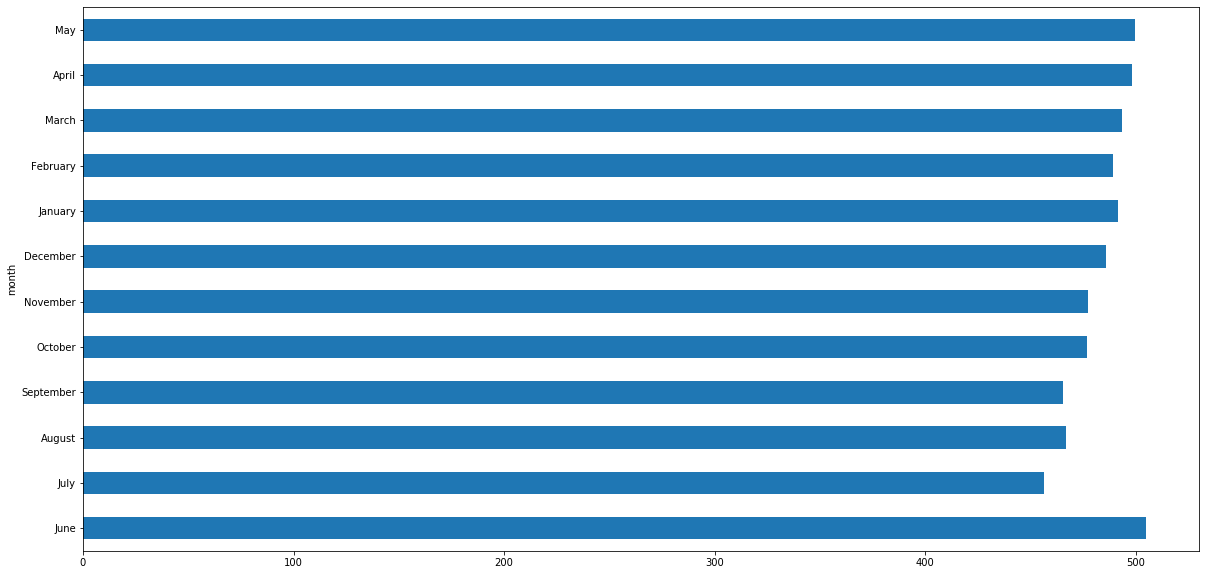

In [136]:
mean_of_month.plot(kind = 'barh', figsize = (20,10))

When we look at price averages between months, we see a similar pattern. The price of houses available on the AirBnB seems to decline after June and get the lowest in July. So it seems that if we recommend visiting Istanbul we should mention that rents are cheaper in Autumn.

##### Question 2 -- Which neighbourhoods are more popular to stay at?

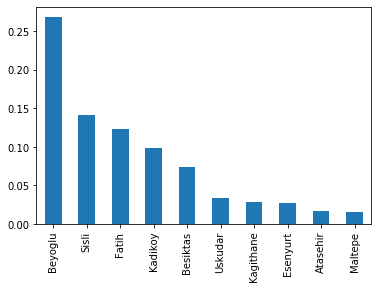

In [142]:
(listings['neighbourhood_cleansed'].value_counts()/listings.shape[0]).sort_values(ascending=False)[:10].plot(kind='bar', legend=None)

It looks like Beyoğlu and Şişli are the most popular places to rent a house in Istanbul. When we look at the graph above we see that most available houses are the ones that are closest to the most visited sites in Istanbul.  
Let's look at the price averages of these neighbourhoods.

In [143]:
#getting rid of $ sign in the price column and converting to numeric variable
listings['price'] = listings['price'].str.replace('$','').str.replace(',','').astype(float)

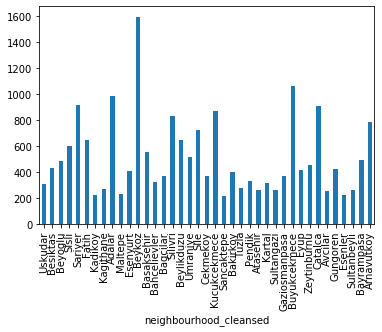

In [144]:
listings.groupby(listings['neighbourhood_cleansed'],
                                 sort=False)['price'].mean().plot(kind='bar', legend=None)

When we look at prices, the most popular sites are on the average prices. We see some such as Beykoz which is a place, where bigger more luxurious houses are common. However, there are some places such as Büyükçekmece, Çatalca and Silivri which the house prices are higher even though they are located very far away from city center. These places tend to be vacation areas, which might explain their high prices. 

###### Question3--Is there a relationship between the house factors and the price?  
Let's look at the relationship between number of accomodations, beds and bathrooms and the price. We expect that the more bedrooms and bathrooms are offered in a house should effect the income gained.

In [222]:
#missing values in bedrooms and bathrooms columns were imputed to their means.
listings['bedrooms'] = listings['bedrooms'].fillna(listings['bedrooms'].mean())
listings['bathrooms'] = listings['bathrooms'].fillna(listings['bathrooms'].mean())
#sampling data
X=listings[['accommodates','bedrooms','bathrooms']]
y=listings['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
#linear regression
lm_model = LinearRegression(normalize=True) # Instantiate


In [224]:
#fitting and predicting the model
lm_model.fit(X_train, y_train) #Fit
y_test_preds = lm_model.predict(X_test)
r2_score(y_test, y_test_preds)

0.0243806994272997

In [225]:
#calculating coefficient weights
def coef_weights(coefficients, X_train):
    '''
    Function to get coefficients back for each of the features
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
2,bathrooms,92.523693,92.523693
0,accommodates,92.320847,92.320847
1,bedrooms,-8.543706,8.543706


The simple model we ran showed us that, there is no relationship between house factors suchs as number of bedrooms, bathrooms, accommodation and price.